In [1]:
from utils import ModelImporter, Preprocessing, Metrics
import torch
import torchsummary
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
%reload_ext autoreload

# Analize Model with the Public Test Data

In [2]:
#load data
pre = Preprocessing('fer2013')
pre.load_data(filename='test_private_norm.csv', name='test')

X_df = pre.get(name='test').drop(columns=['emotion'])
y_df = pre.get(name='test')['emotion']

In [3]:
dtype = torch.float
device = torch.device("cpu")

n_classes = 7
n_epochs = 200
learning_rate = 0.001
batch_size = 64

loss_ep_n = 90
acc_ep_n = 140
f1_ep_n = 150
bs_ep_n = 180

model_name = f'cnn_triple_layer_D_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{bs_ep_n}'

m_importer = ModelImporter('fer2013_DatasetD')

model = m_importer.load_nn_model(model_name)

['cnn_triple_layer_D_bs_0.001_64_200_7', 1, 7, [48, 48], 10, 15, 10, 2]
load model CnnTripleLayer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=360, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=7, bias=True)
)


In [10]:
torchsummary.summary(model, (1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 48, 48]             100
       BatchNorm2d-2           [-1, 10, 48, 48]              20
         MaxPool2d-3           [-1, 10, 24, 24]               0
            Conv2d-4           [-1, 15, 24, 24]           1,365
       BatchNorm2d-5           [-1, 15, 24, 24]              30
         MaxPool2d-6           [-1, 15, 12, 12]               0
            Conv2d-7           [-1, 10, 12, 12]           1,360
       BatchNorm2d-8           [-1, 10, 12, 12]              20
         MaxPool2d-9             [-1, 10, 6, 6]               0
          Dropout-10                  [-1, 360]               0
           Linear-11                   [-1, 32]          11,552
          Dropout-12                   [-1, 32]               0
           Linear-13                    [-1, 7]             231
Total params: 14,678
Trainable params: 

In [4]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)

In [5]:
y_pred_prob = model(X_test)

In [8]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
labels_num = [0, 1, 2, 3, 4, 5, 6]
metrics = Metrics(y_test, y_pred, labels, labels_num)

<module 'matplotlib.pyplot' from '/Users/raroito/anaconda3/envs/facial_expression_recognition/lib/python3.6/site-packages/matplotlib/pyplot.py'>

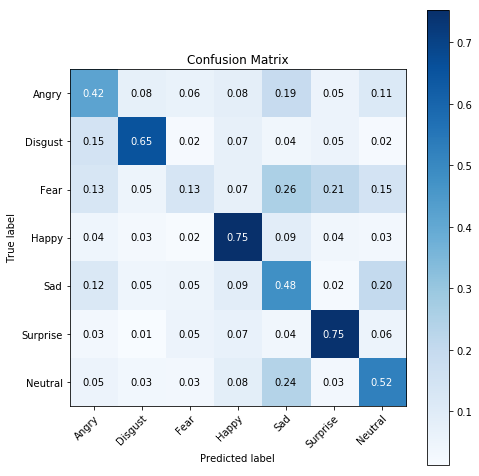

In [11]:
metrics.represent_cm()

In [12]:
metrics.balanced_score()

0.5292701098444871

In [14]:
model_name = f'cnn_triple_layer_D_bs_{learning_rate}_{batch_size}_{n_epochs}_{n_classes}_epoch{acc_ep_n}'
model = m_importer.load_nn_model(model_name)

['cnn_triple_layer_D_bs_0.001_64_200_7', 1, 7, [48, 48], 10, 15, 10, 2]
load model CnnTripleLayer(
  (drop_hidden): Dropout(p=0.5)
  (drop_visible): Dropout(p=0.2)
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=360, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=7, bias=True)
)


In [15]:
X_test = model.reshape_data(torch.tensor(X_df.values, device=device, dtype=dtype))
y_test = torch.tensor(y_df.values, device=device, dtype=torch.long)
y_pred_prob = model(X_test)
y_pred = y_pred_prob.argmax(1)
accuracy_soft = (y_pred == y_test).float().mean()
accuracy_soft

tensor(0.5436)